In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

wine = load_wine()
feature_names =  wine.feature_names
target_names = wine.target_names
print(target_names)

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

['class_0' 'class_1' 'class_2']


In [2]:


clf = DecisionTreeClassifier(
                            criterion='gini', 
                             random_state=30, 
                             splitter='random', 
                             max_depth=5, 
                             min_samples_leaf=5,
                             min_samples_split=5
                            )

clf.fit(x_train, y_train)

print('train score: ', clf.score(x_train, y_train))
print('test score: ', clf.score(x_test, y_test))


train score:  0.9193548387096774
test score:  0.8518518518518519


{('alcohol', 0.0045809951811809895), ('hue', 0.0), ('ash', 0.0013765009558837117), ('malic_acid', 0.0), ('proline', 0.01736960672864454), ('flavanoids', 0.0), ('magnesium', 0.07500103852138502), ('proanthocyanins', 0.0), ('od280/od315_of_diluted_wines', 0.37428024113179026), ('total_phenols', 0.0), ('color_intensity', 0.5269967041034275), ('alcalinity_of_ash', 0.0), ('nonflavanoid_phenols', 0.00039491337768798467)}


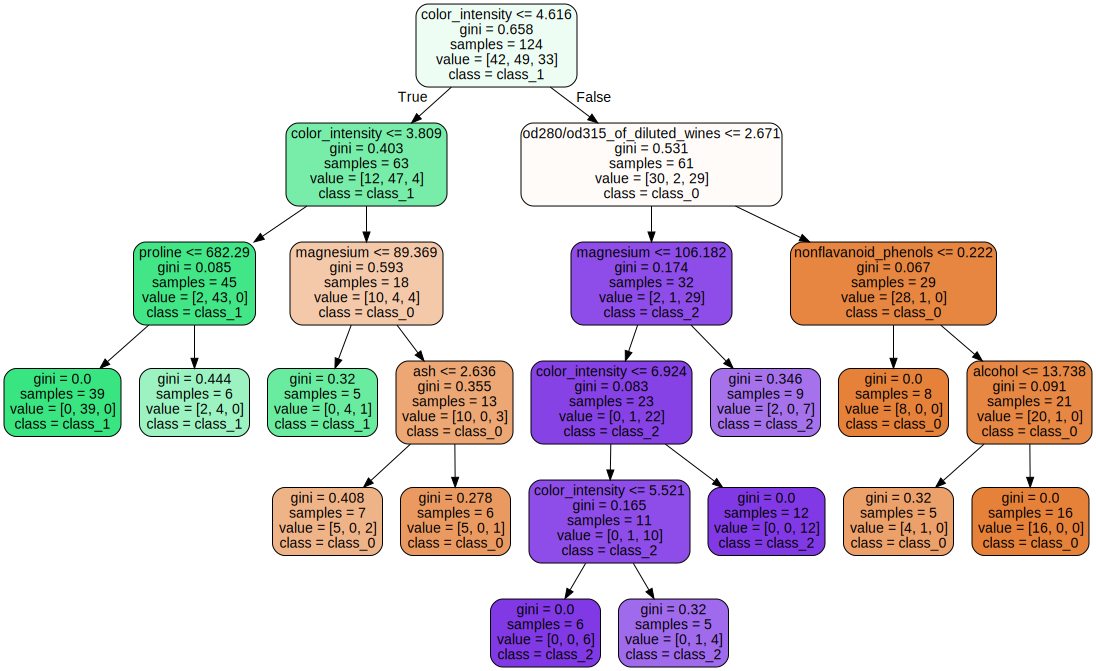

In [3]:
import graphviz
import sklearn

dot_data = sklearn.tree.export_graphviz(clf, 
                                        feature_names=feature_names,
                                        class_names=target_names, 
                                       filled = True,
                                       rounded=True)

graph = graphviz.Source(dot_data)

print({*zip(feature_names,clf.feature_importances_)})
graph

In [4]:
clf.apply(x_test)

array([19,  3, 22, 14,  3,  4, 22,  3, 16, 17, 19,  3,  4,  3, 21,  6,  4,
       22, 16, 21,  3, 21, 19,  3,  3,  8, 21,  8,  3,  9, 14,  3, 16,  8,
       15, 17, 16, 22, 22, 19,  3,  4,  3, 14,  4, 21,  3, 16, 21,  4,  8,
       17, 16, 16])

In [5]:
clf.predict(x_test)

array([0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 1, 0, 2, 2, 2])

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, wine.data, wine.target, cv=5)

array([0.69444444, 0.69444444, 0.97222222, 0.97142857, 0.94285714])

In [7]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


rgn = np.random.RandomState(1)

x = np.sort(5* rgn.rand(80,1), axis=0)

print(x.shape)

y=  np.sin(x).ravel()

print(y.shape)

y[::5] += 3* (0.5-rgn.rand(16))


(80, 1)
(80,)


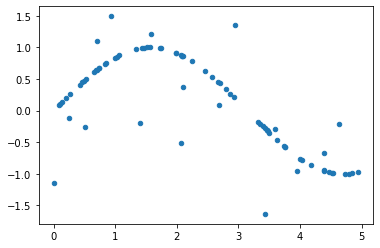

In [8]:
plt.figure()
plt.scatter(x,y,s=20)


In [9]:
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=5)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2) 

In [10]:
np.mean(cross_val_score(reg_1, x_train, y_train))

0.7115750086185391

In [11]:
reg_1.fit(x_train,y_train)
print(reg_1.score(x_test,y_test))


reg_2.fit(x_train,y_train)
print(reg_2.score(x_test,y_test))

0.49219162356849633
0.384706077109339


In [12]:
y_pre = reg_1.predict(x_test)

In [13]:
y_pre.shape
y.shape

(80,)

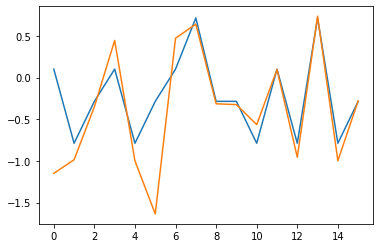

In [14]:
plt.plot(y_pre)
plt.plot(y_test)

In [15]:
data = pd.read_csv('./titanic/train.csv')

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.drop(['Cabin','Ticket','Name'], axis=1, inplace=True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [21]:
data.info()

data = data.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [23]:
labels = data['Embarked'].unique().tolist() 

In [24]:
data.loc[:,'Embarked'] = data.loc[:,'Embarked'].apply(lambda x: labels.index(x))

In [51]:
data['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 889, dtype: int64

In [27]:
data['Sex'] = (data['Sex']=='male').astype('int')

In [31]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [35]:
x = data.loc[:, data.columns!='Survived']
y = data.loc[:, data.columns=='Survived']

In [38]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [43]:
for i in [x_train, x_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [51]:
clf = DecisionTreeClassifier(random_state=30)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

0.7565543071161048


In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,x_train,y_train, cv=10).mean()

0.7185611879160266

In [81]:
score_tr=  []

score_cv = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=10, max_depth=i+1)
    clf.fit(x_train,y_train)
    score_tr.append(clf.score(x_train, y_train))
    score_cv.append(cross_val_score(clf, x, y, cv=10).mean())
    
    
    

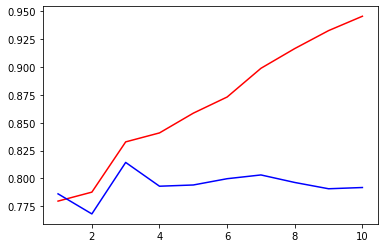

In [84]:
plt.plot(range(1,11),score_tr,'r')
plt.plot(range(1,11),score_cv,'b')
plt.show()

In [87]:
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [111]:
from sklearn.ensemble import RandomForestClassifier 

rclf = RandomForestClassifier(random_state =10, max_depth=3)

rclf.fit(x_train,y_train)

r_score = rclf.score(x_test,y_test)

clf = DecisionTreeClassifier(random_state=10)

clf = clf.fit(x_train, y_train)

c_score = clf.score(x_test, y_test)

print('r: ', r_score)
print('c: ', c_score)


r:  0.9629629629629629
c:  0.9259259259259259


In [114]:
import yaml
train_test_folders_log = './ss.log'

training_testing_results = {
'a': [[1,2,3.4],[2,3,4.1]]
}

with open(train_test_folders_log,'w') as fd:
    yaml.dump(training_testing_results,fd)
